In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.patches as patches

# Clean

In [2]:
## Import, clean and join datasets
tabs = ["CW0302_1920", "CW0302_1819","CW0302_1718","CW0302_1617"]

column_names = ["Geography Code", "Area name", 
                "Any_Once per month", "Any_Once per week","Any_Three times per week",  "Any_Five times per week", 
                "Leisure_Once per month", "Leisure_Once per week","Leisure_Three times per week", "Leisure_Five times per week", 
                "Travel_Once per month", "Travel_Once per week","Travel_Three times per week", "Travel_Five times per week" ]

dfs = []

#loop through all tabs and join
for tab in tabs:
    #import
    df = pd.read_excel("cw0302.xlsx", sheet_name=tab, skiprows=7)
    df = df[~df[df.columns[1]].isnull()] #remove empty rows
    df = df.dropna(axis=1, how='all') #remove empty columns
    
    #rename columns
    df.columns = column_names
    
    #melt frame
    df = pd.melt(df, id_vars=["Geography Code", "Area name"], var_name="Type", value_name="Proportion")
    
    #clean up columns
    df["Frequency"] = [ sub[1] for sub in df["Type"].str.split("_")]
    df["Type"] = [ sub[0] for sub in df["Type"].str.split("_")]
    
    #add year column
    df["Survey_Period"] = "20" + tab.split("_")[1][:2] + "/" + tab.split("_")[1][2:]
    df["Year"] = "20" + tab.split("_")[1][2:] 

    dfs.append(df)

#join all tables
df = pd.concat(dfs, axis=0)

df.head()

,Geography Code,Area name,Type,Proportion,Frequency,Survey_Period,Year
0,E92000001,ENGLAND,Any,16.0952,Once per month,2019/20,2020
1,E12000001,North East,Any,12.5762,Once per month,2019/20,2020
2,E06000047,County Durham,Any,9.6027,Once per month,2019/20,2020
3,E06000005,Darlington,Any,13.0619,Once per month,2019/20,2020
4,E06000001,Hartlepool,Any,10.2977,Once per month,2019/20,2020


# London

In [3]:
pos_dict = {'E09000001': 29,  'E09000002': 32, 'E09000003': 12, 'E09000004': 40,  'E09000005': 19, 'E09000006': 46,
           'E09000007': 20, 'E09000008': 45,  'E09000009': 18,  'E09000010': 5,  'E09000011': 39,  'E09000012': 22,
           'E09000013': 26,  'E09000014': 13,  'E09000015': 11,  'E09000016': 24, 'E09000017': 17,  'E09000018': 25,
           'E09000019': 21,  'E09000020': 27,  'E09000021': 43, 'E09000022': 36,  'E09000023': 38,  'E09000024': 44,
           'E09000025': 31,  'E09000026': 23,  'E09000027': 34,  'E09000028': 37,  'E09000029': 52,  'E09000030': 30,
           'E09000031': 14,  'E09000032': 35,  'E09000033': 28}

display_dict = {'E09000007': 'CMD', 'E09000001': 'CTY', 'E09000012': 'HCK', 'E09000013': 'HMS', 'E09000014': 'HGY',
             'E09000019': 'ISL', 'E09000020': 'KNS', 'E09000022': 'LAM', 'E09000023': 'LSH', 'E09000025': 'NWM',
             'E09000028': 'SWR', 'E09000030': 'TOW', 'E09000032': 'WNS', 'E09000033': 'WST', 'E09000002': 'BAR',
             'E09000003': 'BRN', 'E09000004': 'BXL',  'E09000005': 'BRT',  'E09000006': 'BRM',  'E09000008': 'CRD',
             'E09000009': 'ELG',  'E09000010': 'ENF',  'E09000011': 'GRN',  'E09000015': 'HRW',  'E09000016': 'HVG',
             'E09000017': 'HDN',  'E09000018': 'HNS',  'E09000021': 'KNG',  'E09000024': 'MRT',  'E09000026': 'RDB',
             'E09000027': 'RCH',  'E09000029': 'STN',  'E09000031': 'WTH'}

In [6]:
table = df[df["Geography Code"].isin(pos_dict.keys())]
table.head()

,Geography Code,Area name,Type,Proportion,Frequency,Survey_Period,Year
218,E09000007,Camden,Any,22.2511,Once per month,2019/20,2020
219,E09000001,City of London,Any,20.4931,Once per month,2019/20,2020
220,E09000012,Hackney,Any,37.4197,Once per month,2019/20,2020
221,E09000013,Hammersmith and Fulham,Any,28.0155,Once per month,2019/20,2020
222,E09000014,Haringey,Any,18.6020,Once per month,2019/20,2020


## Bar chart single year - any cycling

In [36]:
filt = (table["Type"] == "Any") & (table["Year"]=="2020")
order = [ 'Once per month', 'Once per week',
       'Three times per week', 'Five times per week']
pivot = table[filt].pivot(index="Area name", columns="Frequency", values="Proportion")
pivot = pivot[order]
pivot.head()

Frequency,Once per month,Once per week,Three times per week,Five times per week
Area name,,,,
Barking and Dagenham,8.4830,6.2855,3.5504,1.7796
Barnet,10.2493,7.0642,4.1356,2.7616
Bexley,6.8080,4.7666,2.7775,2.0354
Brent,12.5926,9.9423,6.0644,2.2697
Bromley,14.8496,11.9086,4.9861,2.1294


In [78]:
font_r = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
font_m = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\Ubuntu-M.ttf')
font_b = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-B.ttf')
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

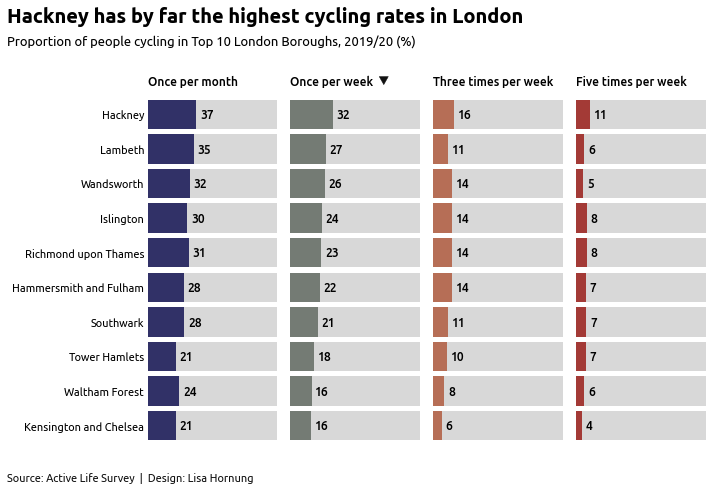

In [158]:
#TOP TEN BOROUGHS

data = pivot.sort_values(by="Once per week", ascending=True)[len(pivot)-10:]


colr = {"Once per month": "#313167", "Once per week": "#747b74", 
        "Three times per week":"#b66e56", "Five times per week": "#a33a36"}

###plot
fig, ax = plt.subplots(figsize=(10,7), sharey=True)


#adjust subplots
plt.subplots_adjust(wspace=0.1, hspace=0.0) 

#title

y = np.arange(len(data))

num = 0
for column in data.columns:
    num+=1
    plt.subplot(1,4,num)
    
    plt.barh(y, data[column],height=0.85, color=colr[column],zorder=3, linewidth=0)
    plt.barh(y, 100,height=0.85, color='#d8d8d8',zorder=2,linewidth=0 )
    
    #value labels
    for i in range(len(data[column])):
        plt.text(data[column][i]+3, y[i] , int(data[column][i]), size=12, va="center", 
                 weight='bold', fontproperties=font_m)
    
    #xaxis
    plt.gca().set_xlim(xmin=0, xmax=100)
    plt.gca().get_xaxis().set_ticks([]) #remove ticks
        
    #yaxis
    plt.gca().set_ylim(ymin=-1, ymax=len(data))
    plt.tick_params(axis='y', length = 0, color = "#444444")
    if num ==1:
        plt.gca().set_yticks(np.arange(0,len(data),1))
        plt.gca().set_yticklabels(data.index, fontsize=11, fontproperties=font_r)
    else:
        plt.yticks([0], [""])
    
    #remove frame
    for pos in ["top", "bottom", "left", "right"]:
        plt.gca().spines[pos].set_visible(False)
        
    #add arrow down
    if column == "Once per week":
        #define style
        style = "Simple, tail_width=0.6, head_width=9, head_length=8"
        kw = dict(arrowstyle=style, color="#111111")

        #define arrows
        a1 = patches.FancyArrowPatch((72, len(data)+0.1), (72, len(data)-0.2),clip_on=False,linewidth=0.5,
                            connectionstyle="arc3,rad=0", **kw)
        plt.gca().add_patch(a1)
        
    plt.title(column, size=12, x=0,y=0.97, ha='left', fontproperties=font_m)

#======
#Title, footer, notes
plt.figtext(-0.07,1.025, "Hackney has by far the highest cycling rates in London", fontproperties=font_b, va='top', fontsize=20)
plt.figtext(-0.07,0.97, "Proportion of people cycling in Top 10 London Boroughs, 2019/20 (%)", fontproperties=font_r, va='top', fontsize=13)
plt.figtext(-0.07,0.1, "Source: Active Life Survey  |  Design: Lisa Hornung", 
            fontproperties=font_r, color="#111111", fontsize=11, va="top")


#save output
plt.savefig("top-10-boroughs-by-cycling-rates_2019-20.png", bbox_inches='tight', transparent=True)

plt.show()

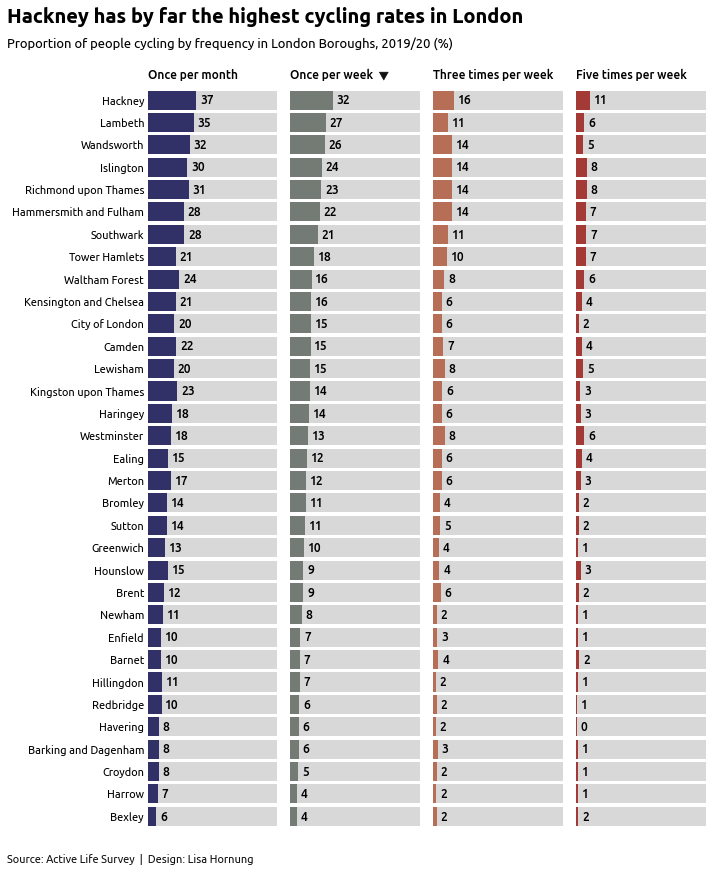

In [171]:
#ALL BOROUGHS

data = pivot.sort_values(by="Once per week", ascending=True)

colr = {"Once per month": "#313167", "Once per week": "#747b74", 
        "Three times per week":"#b66e56", "Five times per week": "#a33a36"}

###plot
fig, ax = plt.subplots(figsize=(10,14), sharey=True)


#adjust subplots
plt.subplots_adjust(wspace=0.1, hspace=0.0) 

#title

y = np.arange(len(data))

num = 0
for column in data.columns:
    num+=1
    plt.subplot(1,4,num)
    
    plt.barh(y, data[column],height=0.85, color=colr[column],zorder=3, linewidth=0)
    plt.barh(y, 100,height=0.85, color='#d8d8d8',zorder=2,linewidth=0 )
    
    #value labels
    for i in range(len(data[column])):
        plt.text(data[column][i]+3, y[i] , int(data[column][i]), size=12, va="center", 
                 weight='bold', fontproperties=font_m)
    
    #xaxis
    plt.gca().set_xlim(xmin=0, xmax=100)
    plt.gca().get_xaxis().set_ticks([]) #remove ticks
        
    #yaxis
    plt.gca().set_ylim(ymin=-1, ymax=len(data))
    plt.tick_params(axis='y', length = 0, color = "#444444")
    if num ==1:
        plt.gca().set_yticks(np.arange(0,len(data),1))
        plt.gca().set_yticklabels(data.index, fontsize=11, fontproperties=font_r)
    else:
        plt.yticks([0], [""])
    
    #remove frame
    for pos in ["top", "bottom", "left", "right"]:
        plt.gca().spines[pos].set_visible(False)
        
    #add arrow down
    if column == "Once per week":
        #define style
        style = "Simple, tail_width=0.6, head_width=9, head_length=8"
        kw = dict(arrowstyle=style, color="#111111")

        #define arrows
        a1 = patches.FancyArrowPatch((72, len(data)+0.1), (72, len(data)-0.2),clip_on=False,linewidth=0.5,
                            connectionstyle="arc3,rad=0", **kw)
        plt.gca().add_patch(a1)
        
    plt.title(column, size=12, x=0,y=0.99, ha='left', fontproperties=font_m)

#======
#Title, footer, notes
plt.figtext(-0.07,0.95, "Hackney has by far the highest cycling rates in London", 
            fontproperties=font_b, va='top', fontsize=20)
plt.figtext(-0.07,0.92, "Proportion of people cycling by frequency in London Boroughs, 2019/20 (%)", 
            fontproperties=font_r, va='top', fontsize=13)
plt.figtext(-0.07,0.11, "Source: Active Life Survey  |  Design: Lisa Hornung", 
            fontproperties=font_r, color="#111111", fontsize=11, va="top")


#save output
plt.savefig("London-boroughs-by-cycling-rates_2019-20.png", bbox_inches='tight', transparent=True)

plt.show()

## Dotplot - single year by reason

In [177]:
filt = (table["Frequency"] == "Once per week") & (table["Year"]=="2020")
pivot = table[filt].pivot(index="Area name", columns="Type", values="Proportion")
pivot.head()

Type,Any,Leisure,Travel
Area name,,,
Barking and Dagenham,6.2855,5.5837,2.3110
Barnet,7.0642,5.7698,4.3206
Bexley,4.7666,3.5155,2.5828
Brent,9.9423,5.8553,5.5475
Bromley,11.9086,7.9500,3.8314


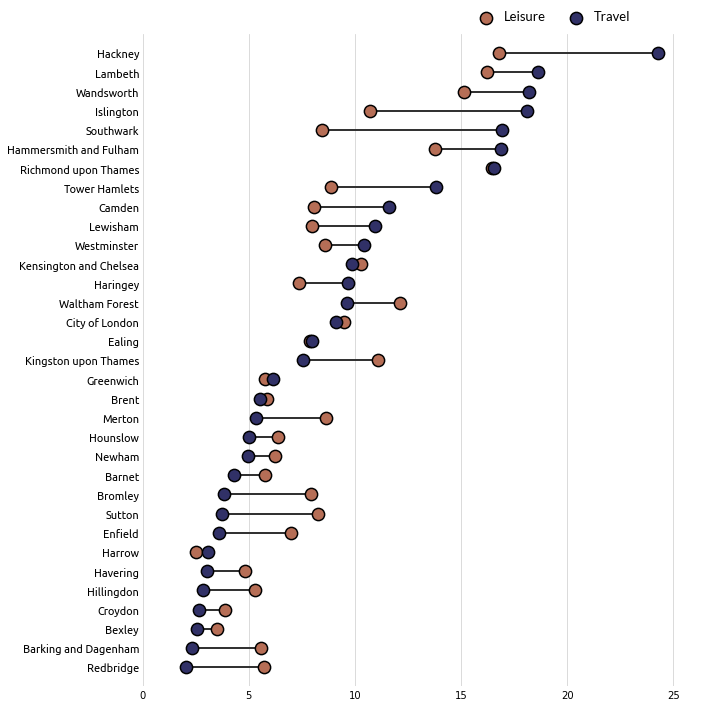

In [205]:
data = pivot.sort_values(by="Travel", ascending=True)

colr = {"Travel": "#313167", "Leisure":"#b66e56", "Five times per week": "#a33a36"}

###plot
fig, ax = plt.subplots(figsize=(10,12), sharey=True)


#dot plot
my_range = np.arange(len(data))
size = 150
plt.hlines(y=my_range, xmin=data['Leisure'], xmax=data['Travel'],linewidth=2, color='#333333', alpha=1, zorder=2)
plt.scatter(data['Leisure'], my_range, s=size, color=colr["Leisure"], linewidth=1.5, edgecolors='black', 
            alpha=1, label='Leisure', zorder=3)
plt.scatter(data['Travel'], my_range, s=size, color=colr["Travel"],linewidth=1.5, edgecolors='black', 
            alpha=1 , label='Travel', zorder=3)



#xaxis
plt.gca().set_xlim(xmin=0, xmax=max(data[["Travel", "Leisure"]].max())+2)
plt.gca().get_xaxis().set_ticks([0, 5,10,15,20,25]) #remove ticks
plt.grid(visible=True, axis='x', zorder=1, color = "#D3D3D3")
        
#yaxis
plt.gca().set_ylim(ymin=-1, ymax=len(data))
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.gca().set_yticks(np.arange(0,len(data),1))
plt.gca().set_yticklabels(data.index, fontsize=11, fontproperties=font_r)

#remove frame
for pos in ["top", "bottom", "left", "right"]:
    plt.gca().spines[pos].set_visible(False)
    
# ==========
#legend
L = ax.legend(ncol=2, frameon=False, loc='upper right',bbox_to_anchor=(0.89,1.05))
plt.setp(L.texts, fontfamily="Lato", fontsize=13)

plt.show()